In [461]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from astropy.cosmology import FlatLambdaCDM, FlatwCDM
from scipy.integrate import quad

In [463]:
import seaborn as sns
sns.set_style('whitegrid')
sns.set_context('notebook')

In [462]:
%matplotlib inline

In [1147]:
### Variable definitions for hubble constant, effective potential, etc...
ho = 72.5
N_eff = 3.04
O_gamma = (2.469e-5)
h = ho/100.0
O_R = O_gamma * (1.0 / (h**2.0)) * (1.0 + (0.2271)*N_eff)
c = 299792.458 #km/s
alpha = 1 * (c / ho)
log = True

In [1148]:
### ov is a given dark energy constant, and om is a given matter constant
### NCr, NCk are constants used to nullify parametric densities for certain models, i.e. Omega_rad * NCr = 0

### List of models put into an array called 'modeler'
# model, om, ov, NCr, NCk = 'Einstein de-Sitter', 1.0, 0.0, 0.0, 1.0
# model, om, ov, NCr, NCk = 'Low Density', .05, 0.0, 1.0, 1.0
# model, om, ov, NCr, NCk = 'High Lambda', 0.2, 0.8, 1.0, (0.0)
# model, om, ov, NCr, NCk = 'O_m = .1, Omega_lamda = .9', 0.1, 0.9, 1.0, (0.)
# model, om, ov, NCr, NCk = 'O_m = .2, Omega_lamda = .8', 0.2, 0.8, 1.0, (0.)
# model, om, ov, NCr, NCk = 'O_m = .3, Omega_lamda = .7', 0.3, 0.7, 1.0, (0.)
# model, om, ov, NCr, NCk = 'O_m = .4, Omega_lamda = .6', 0.4, 0.6, 1.0, (0.)
# model, om, ov, NCr, NCk = 'O_m = .5, Omega_lamda = .5', 0.5, 0.5, 1.0, (0.)
# model, om, ov, NCr, NCk = 'O_m = .6, Omega_lamda = .4', 0.6, 0.4, 1.0, (0.)

In [1193]:
modeler = [('Einstein de-Sitter', 1.0, 0.0, 0.0, 1.0, -1.),('Low Density', .05, 0.0, 1.0, 1.0, -1.),
('High Lambda', 0.2, 0.8, 1.0, (0.0), -1.),('O_m = .1, Omega_lamda = .9', 0.1, 0.9, 1.0, (0.), -1.),
('O_m = .2, Omega_lamda = .8', 0.2, 0.8, 1.0, (0.), -1.),('O_m = .3, Omega_lamda = .7', 0.3, 0.7, 1.0, (0.), -1.),
('O_m = .4, Omega_lamda = .6', 0.4, 0.6, 1.0, (0.), -1.),('O_m = .5, Omega_lamda = .5', 0.5, 0.5, 1.0, (0.), -1.),
('O_m = .6, Omega_lamda = .4', 0.6, 0.4, 1.0, (0.), -1.),('test_w1', 0.3, 0.7, 0.0, 0.0, -.9), 
           ('test_w2', 0.3, 0.7, 0.0, 0., -1.0),('test_w3', 0.3, 0.7, 0.0, 0., -1.1)]

print (modeler)
print (modeler[6][2])

[('Einstein de-Sitter', 1.0, 0.0, 0.0, 1.0, -1.0), ('Low Density', 0.05, 0.0, 1.0, 1.0, -1.0), ('High Lambda', 0.2, 0.8, 1.0, 0.0, -1.0), ('O_m = .1, Omega_lamda = .9', 0.1, 0.9, 1.0, 0.0, -1.0), ('O_m = .2, Omega_lamda = .8', 0.2, 0.8, 1.0, 0.0, -1.0), ('O_m = .3, Omega_lamda = .7', 0.3, 0.7, 1.0, 0.0, -1.0), ('O_m = .4, Omega_lamda = .6', 0.4, 0.6, 1.0, 0.0, -1.0), ('O_m = .5, Omega_lamda = .5', 0.5, 0.5, 1.0, 0.0, -1.0), ('O_m = .6, Omega_lamda = .4', 0.6, 0.4, 1.0, 0.0, -1.0), ('test_w1', 0.3, 0.7, 0.0, 0.0, -0.9), ('test_w2', 0.3, 0.7, 0.0, 0.0, -1.0), ('test_w3', 0.3, 0.7, 0.0, 0.0, -1.1)]
0.6


In [1194]:
### Build a dictionary of models
models = {}

for x in modeler:
    model = x[0]
    om = x[1]
    ov = x[2]
    NCr = x[3]
    NCk = x[4]
    w = x[5]
    new_key = model
    new_value = (om, ov, NCr, NCk, w)
    models[new_key]=new_value
print (models)

### Build a csv file containing model information for easier calling
# import csv

# csv_filename = 'models.csv'
# with open('models.csv','w') as x:
#     writer = csv.writer(x)
#     writer.writerow(["Model","O_m","O_lambda","NCr","NCk"])
#     for key, value in models.items():
#         b = models[key]
#         writer.writerow([key,b[0],b[1],b[2],b[3]])

{'Einstein de-Sitter': (1.0, 0.0, 0.0, 1.0, -1.0), 'Low Density': (0.05, 0.0, 1.0, 1.0, -1.0), 'High Lambda': (0.2, 0.8, 1.0, 0.0, -1.0), 'O_m = .1, Omega_lamda = .9': (0.1, 0.9, 1.0, 0.0, -1.0), 'O_m = .2, Omega_lamda = .8': (0.2, 0.8, 1.0, 0.0, -1.0), 'O_m = .3, Omega_lamda = .7': (0.3, 0.7, 1.0, 0.0, -1.0), 'O_m = .4, Omega_lamda = .6': (0.4, 0.6, 1.0, 0.0, -1.0), 'O_m = .5, Omega_lamda = .5': (0.5, 0.5, 1.0, 0.0, -1.0), 'O_m = .6, Omega_lamda = .4': (0.6, 0.4, 1.0, 0.0, -1.0), 'test_w1': (0.3, 0.7, 0.0, 0.0, -0.9), 'test_w2': (0.3, 0.7, 0.0, 0.0, -1.0), 'test_w3': (0.3, 0.7, 0.0, 0.0, -1.1)}


In [1213]:
### Defining Functions

### OM returns the z dependent matter density function, om is the matter density constant
def OM(z, om):
    return om * (1.0 + z)**3.0

### OR returns the z dependent radiation function, O_R is the radiation density constant
### O_R = NCr * O_gamma * (1.0 / (h**2.0)) * (1.0 + (0.2271)*N_eff)
# print (O_R)
def OR(z, ho):
    return NCr * O_R * (1 + z)**4.0

### Ok returns the z dependent curvature function, O_k is the curvature density constant, 
def Ok(z, om, ov, ho):
    O_k = 1 - om - ov - O_R
    return NCk * O_k * (1 + z)**2.0

### O_de returns a list matching size of z array (for density evolution plot)
def O_de(z, ov):
    lamd = []
    for x in z:
        lamd.append(ov)
    return lamd

### Returns the input value of dark energy density 
def O_de2(z, ov, w):
        return ov * (1 + z)**(3*(1 + w))
    
### Returns a function for E(z)    
def E_of_z(z, om, ov, w, ho):
    matter = OM(z, om)
    radiation = OR(z, ho)
    curvature = Ok(z, om, ov, O_R)
    dark_energy = O_de2(z, ov, w)
    
    E_squared = matter + radiation + curvature + dark_energy
    return np.sqrt(E_squared)

### Returns and integratable function of 1 /E(z)
def E_int(z, om, ov, w, ho):
    ups = (1./(E_of_z(z, om, ov, w, ho)))
    return ups

### Returns the luminosity distance or the distance modulus, if the log = False,True respectively
def luminosity_distance(z, om, ov, w, ho, log):
    integral = np.empty_like(z)
    for i, u in enumerate(z):
        integral[i] = quad(E_int, 0., u, args = (om, ov, w, ho))[0]
    lum_dist = (1 + z) * c * integral * (1 / ho)
    if log:
        return 5 * np.log10(lum_dist) + 25
    else:
        return lum_dist
    
def diam_dist(z, om, ov, w, ho, log):
    lum = luminosity_distance(z, om, ov, w, ho, log)
    ang = lum/(1 + z)**2
    return ang

Point of Intersection: z = 3777.2509880749008
16180564481.466694


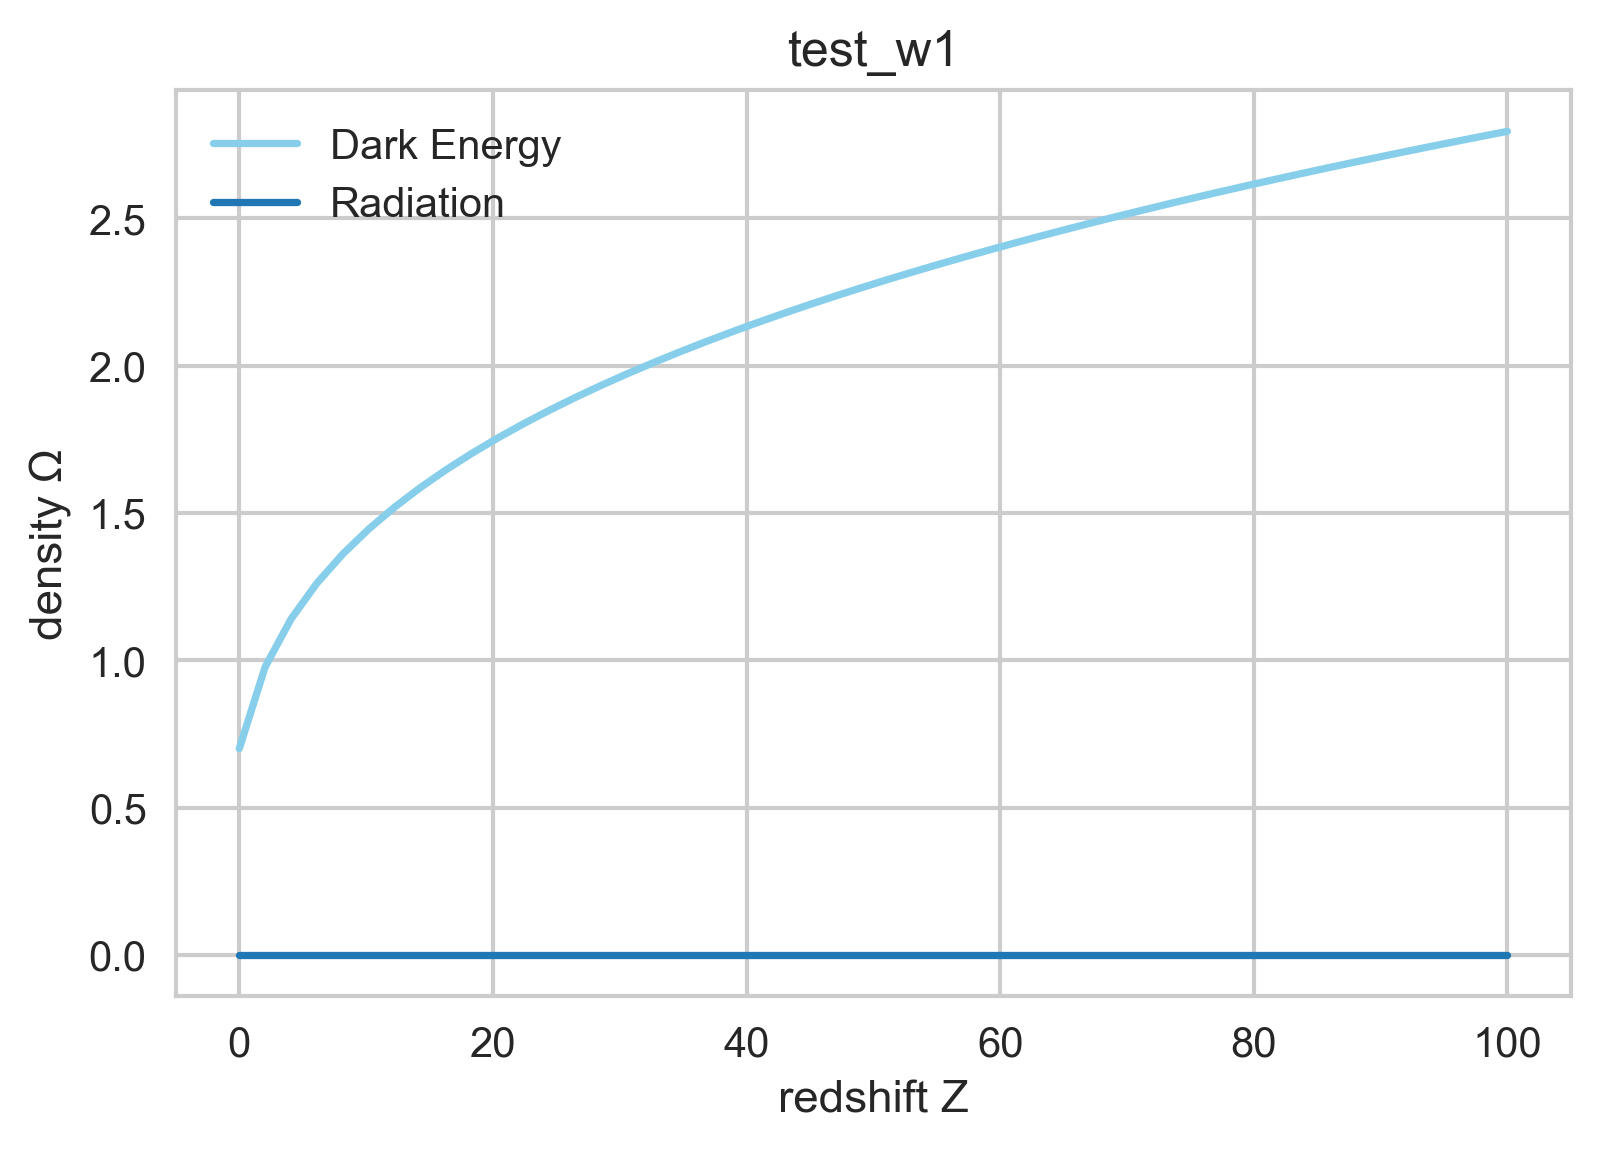

In [1165]:
### Plotting Density evolution of a particular model

for key in models:
      
    model = key
    O_matter = models[key][0]
    O_lambder = models[key][1]
    omega = models[key][4]
    
    matter = OM(z, O_matter)
    curvature = Ok(z, O_matter, O_lambder, O_R)
    radiation = OR(z, ho)
    dark_e = O_de2(z, O_lambder, omega)
    
    ### Calculate where matter and radiation densities intersect
#     Intersect = (O_matter/O_R) - 1
    
    ### Value of OM at the redshift of 
#     Omega_alpha = OM(Intersect, O_matter)
    ### Temp variable for z = np.linspace function
#     v = Intersect + 500
    z = np.linspace(0,100,50)
    
    if 'test_w1' in key:
#         plt.plot(z, matter, label = 'Matter', color = 'r')
        plt.plot(z, dark_e, label = 'Dark Energy', color = 'skyblue')
        plt.plot(z, radiation, label = 'Radiation')
#         plt.plot(z, curvature, label = 'Curvature', color = 'orange')

        print ('Point of Intersection: z = {}'.format(Intersect))
        print (Omega_alpha)
        
        plt.title(model)

plt.legend()
plt.ylabel('density Ω')
plt.xlabel('redshift Z')

mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['figure.dpi'] = 300

1258.4169960249671 199760055.32674944
2517.8339920499343 3196160885.227991
3777.2509880749008 16180564481.466694
5036.667984099869 51138574163.64786
6296.084980124835 124850034579.21834
3777.2509880749008 16180564481.466694
3777.2509880749008 16180564481.466694
3777.2509880749008 16180564481.466694


Text(0.5,1,'redshift of matter radiation equality')

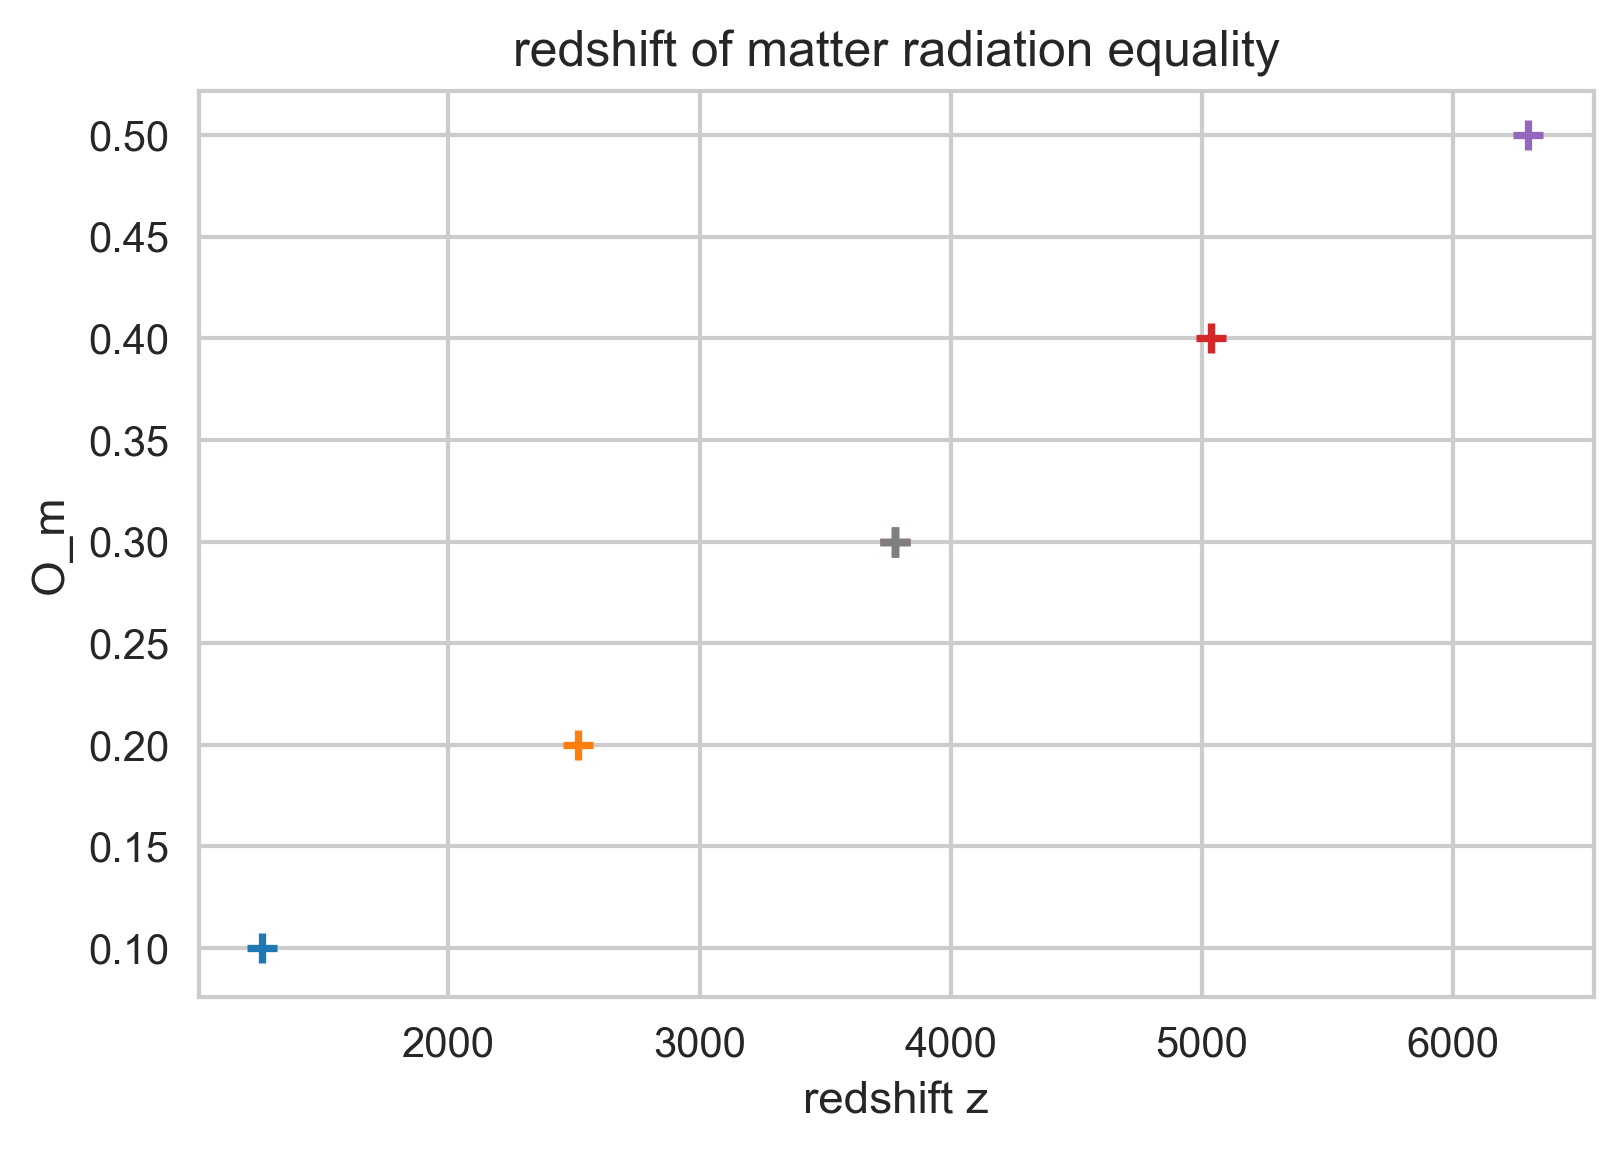

In [1154]:
### Plot of values at points of intersection

for key in models:
    
    model = key
    O_matter = models[key][0]
    O_lambder = models[key][1]
    w = models[key][4]


    if 'High' in key or 'Low' in key or 'Einstein' in key:
        continue
        
    if 'O_m = .6' in key:
        continue
        
    else:
        ### Calculate where matter and radiation densities intersect (z value)
        Intersect = (O_matter/O_R) - 1
        ### Value of OM at the intersection (Also O_r)
        Omega_alpha = OM(Intersect, O_matter)
        print (Intersect, Omega_alpha)
        plt.scatter(Intersect, O_matter, marker = '+')
    
plt.ylabel('O_m')
plt.xlabel('redshift z')
plt.title('redshift of matter radiation equality')

Text(0.5,1,'E vs. redshift z')

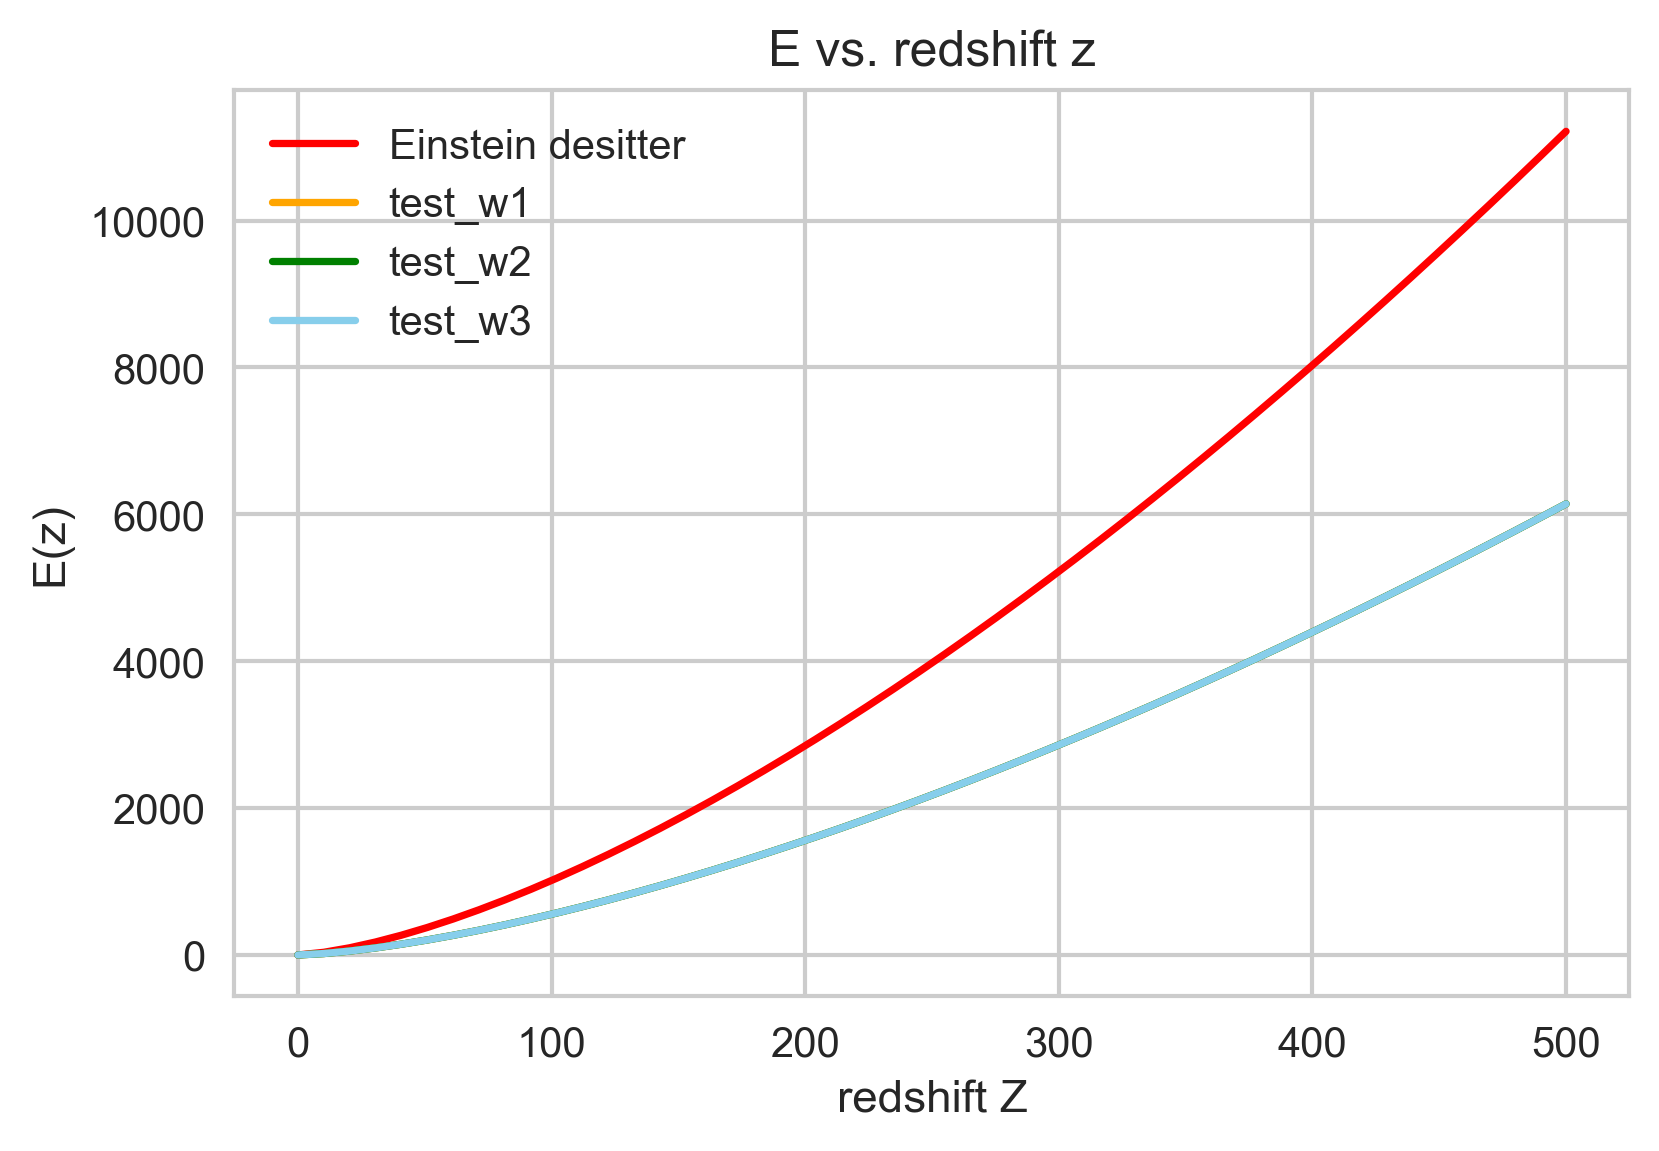

In [1196]:
### Plot E(z) of various models together

z = np.linspace(0,500,50) 

for key in models:
    model = key
    O_matter = models[key][0]
    O_lambder = models[key][1]
    omega = models[key][4]

    Ee = E_of_z(z, O_matter, O_lambder, omega, ho)
    if 'test_w3'in key:
        plt.plot(z, Ee,label = 'test_w3', color = 'skyblue')
    if 'Einstein' in key:
        plt.plot(z, Ee, label = 'Einstein desitter', color = 'r')
    if 'test_w2' in key:
        plt.plot(z, Ee, label = 'test_w2', color = 'g')
    if 'test_w1' in key:
        plt.plot(z, Ee, label = 'test_w1', color = 'orange')
    
plt.legend()
plt.ylabel('E(z)')
plt.xlabel('redshift Z')
plt.title('E vs. redshift z')

/Users/markpoe/astroml_miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:51: RuntimeWarning: divide by zero encountered in log10


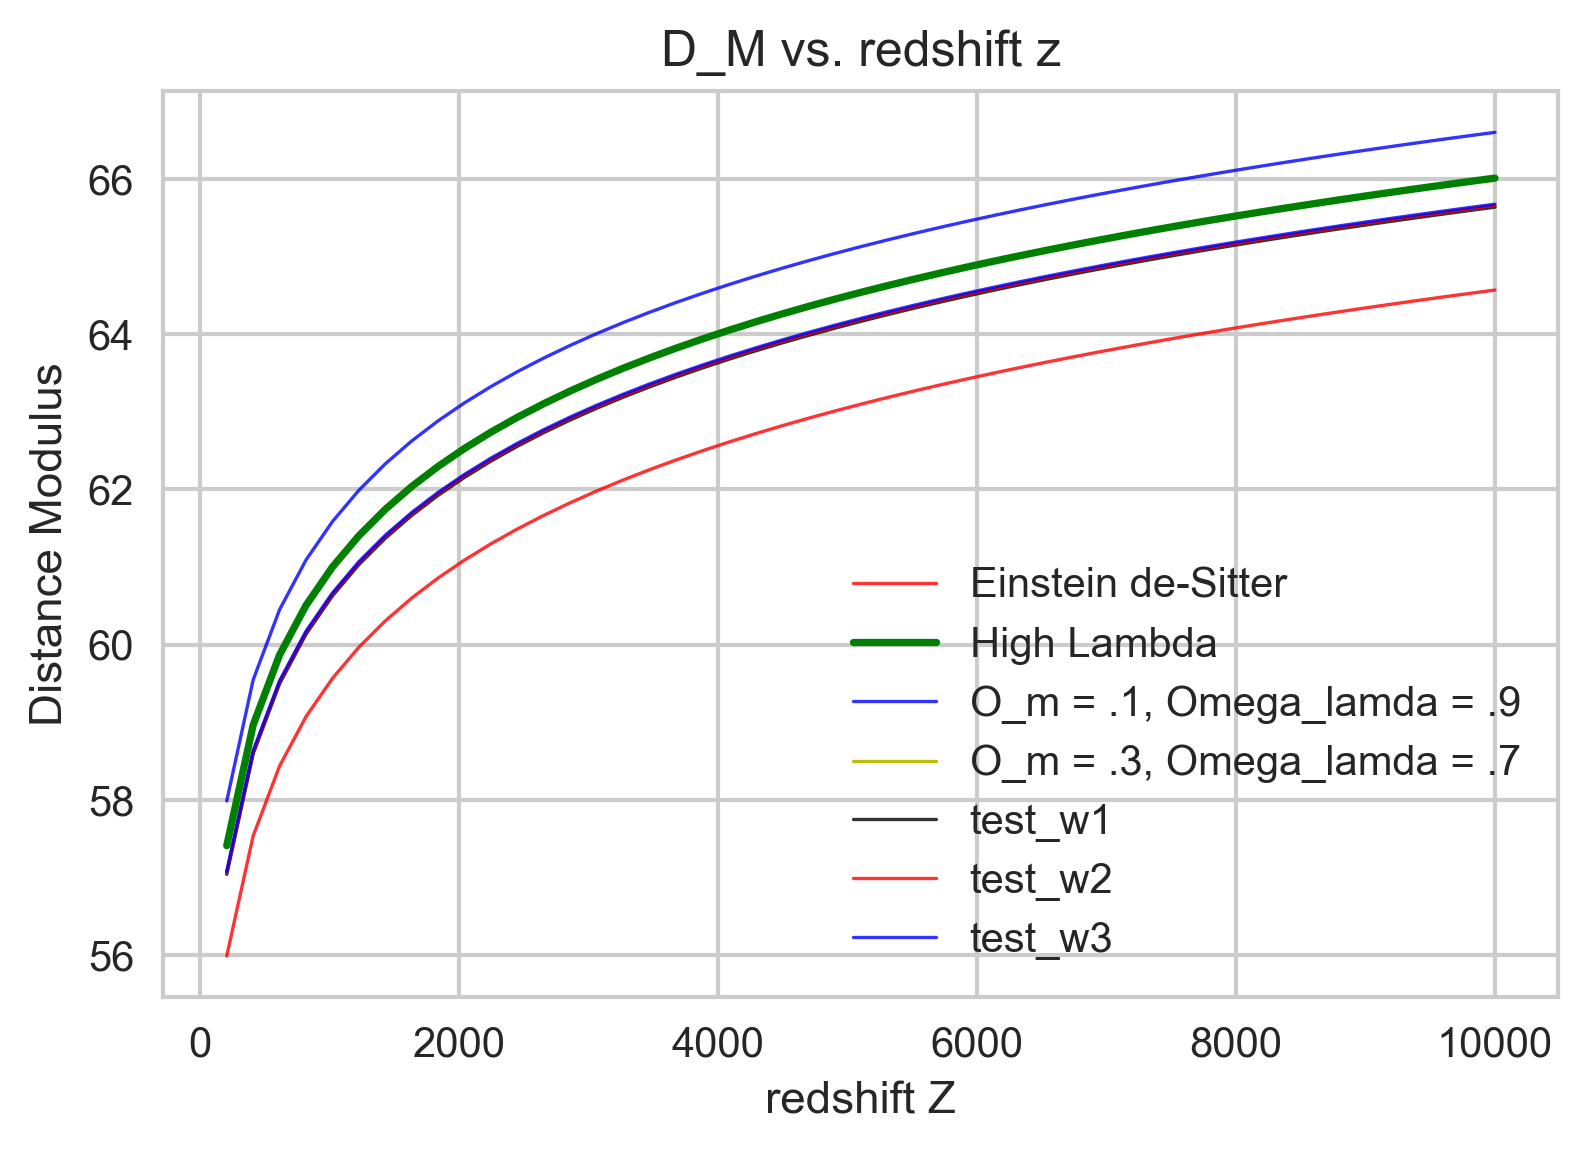

In [1211]:
### Plotting luminosity distance OR distance modulus for various models together

log = True
z = np.linspace(0.,10000,50)

for key in models:
    model = key
    O_matter = models[key][0]
    O_lambder = models[key][1]
    omega = models[key][4]
    
    ld = luminosity_distance(z, O_matter, O_lambder, omega, ho, log)
    
#     if 'Low'in key:
#         plt.plot(z, ld, label = model, color = 'skyblue')
    if 'Einstein' in key:
        plt.plot(z, ld, label = model, color = 'r', linewidth = .8, alpha = .8 )
    if 'High ' in key:
        plt.plot(z, ld, label = model, color = 'g')
    if 'O_m = .3' in key:
        plt.plot(z, ld, label = model, color = 'y', linewidth = .8, alpha = 1)
    if 'O_m = .1' in key:
        plt.plot(z, ld, label = model, color = 'b', linewidth = .8, alpha = .8)
    if 'test_w1' in key:
        plt.plot(z, ld, label = model, color = 'black', linewidth = .8, alpha = .8)
    if 'test_w2' in key:
        plt.plot(z, ld, label = model, color = 'r', linewidth = .8, alpha = .8)
    if 'test_w3' in key:
        plt.plot(z, ld, label = model, color = 'b', linewidth = .8, alpha = .8)
        

### Load observational data
# jla = np.loadtxt('jla_mub.txt', usecols = (0,1))


### Plot observational and theoretical data together
# plt.scatter(jla[:,0], jla[:,1], color = 'g', label = 'JLA', marker = '+', linewidth = .8, alpha = .9 )


plt.legend()
plt.xlabel('redshift Z')
if log:
    plt.ylabel('Distance Modulus')
    plt.title('D_M vs. redshift z')
else:
    plt.ylabel('Luminosity Distance')
    plt.title('D_L vs. redshift z')



Text(0.5,1,'D_A vs. redshift z')

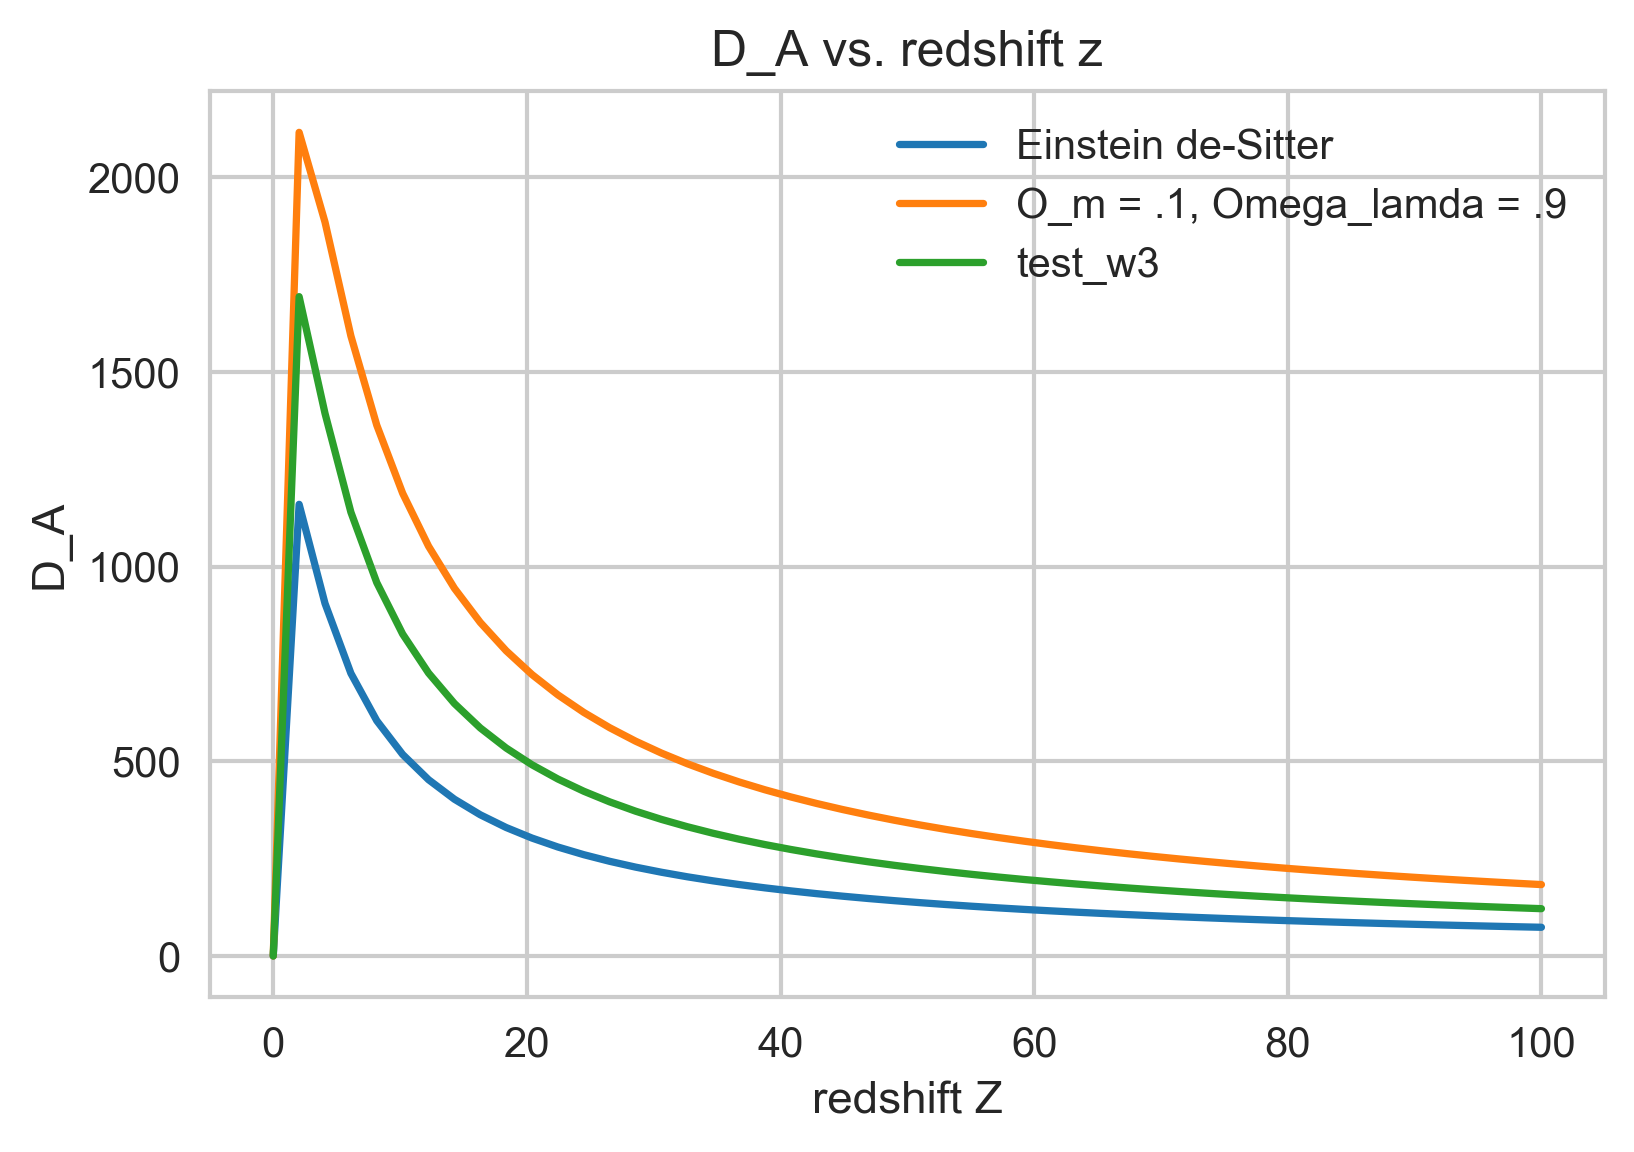

In [1216]:
### Plot Angular-Diameter distance against redshift z

z = np.linspace(0.,100.,50)
log = False

for key in models:
    
    model = key
    O_matter = models[key][0]
    O_lambder = models[key][1]
    omega = models[key][4]
    
    ad = diam_dist(z, O_matter, O_lambder, omega, ho, log)
    
    if 'Einstein'in key:
        plt.plot(z, ad, label = model)#, color = 'r', linewidth = 1, alpha = .8)
    if 'O_m = .1' in key: #o
        plt.plot(z, ad, label = model)#, color = 'b', linewidth = 1, alpha = .8)
    if 'test_w3' in key:
        plt.plot(z, ad, label = model)#, color = 'y', linewidth = 1, alpha = .8)
     
    plt.legend()
    
plt.ylabel('D_A')
plt.xlabel('redshift Z')
plt.title('D_A vs. redshift z')

In [998]:
# ov = 1
# g = O_de2(z, ov)
# plt.plot(g)

Text(0.5,1,'O_m = .6, Omega_lamda = .4')

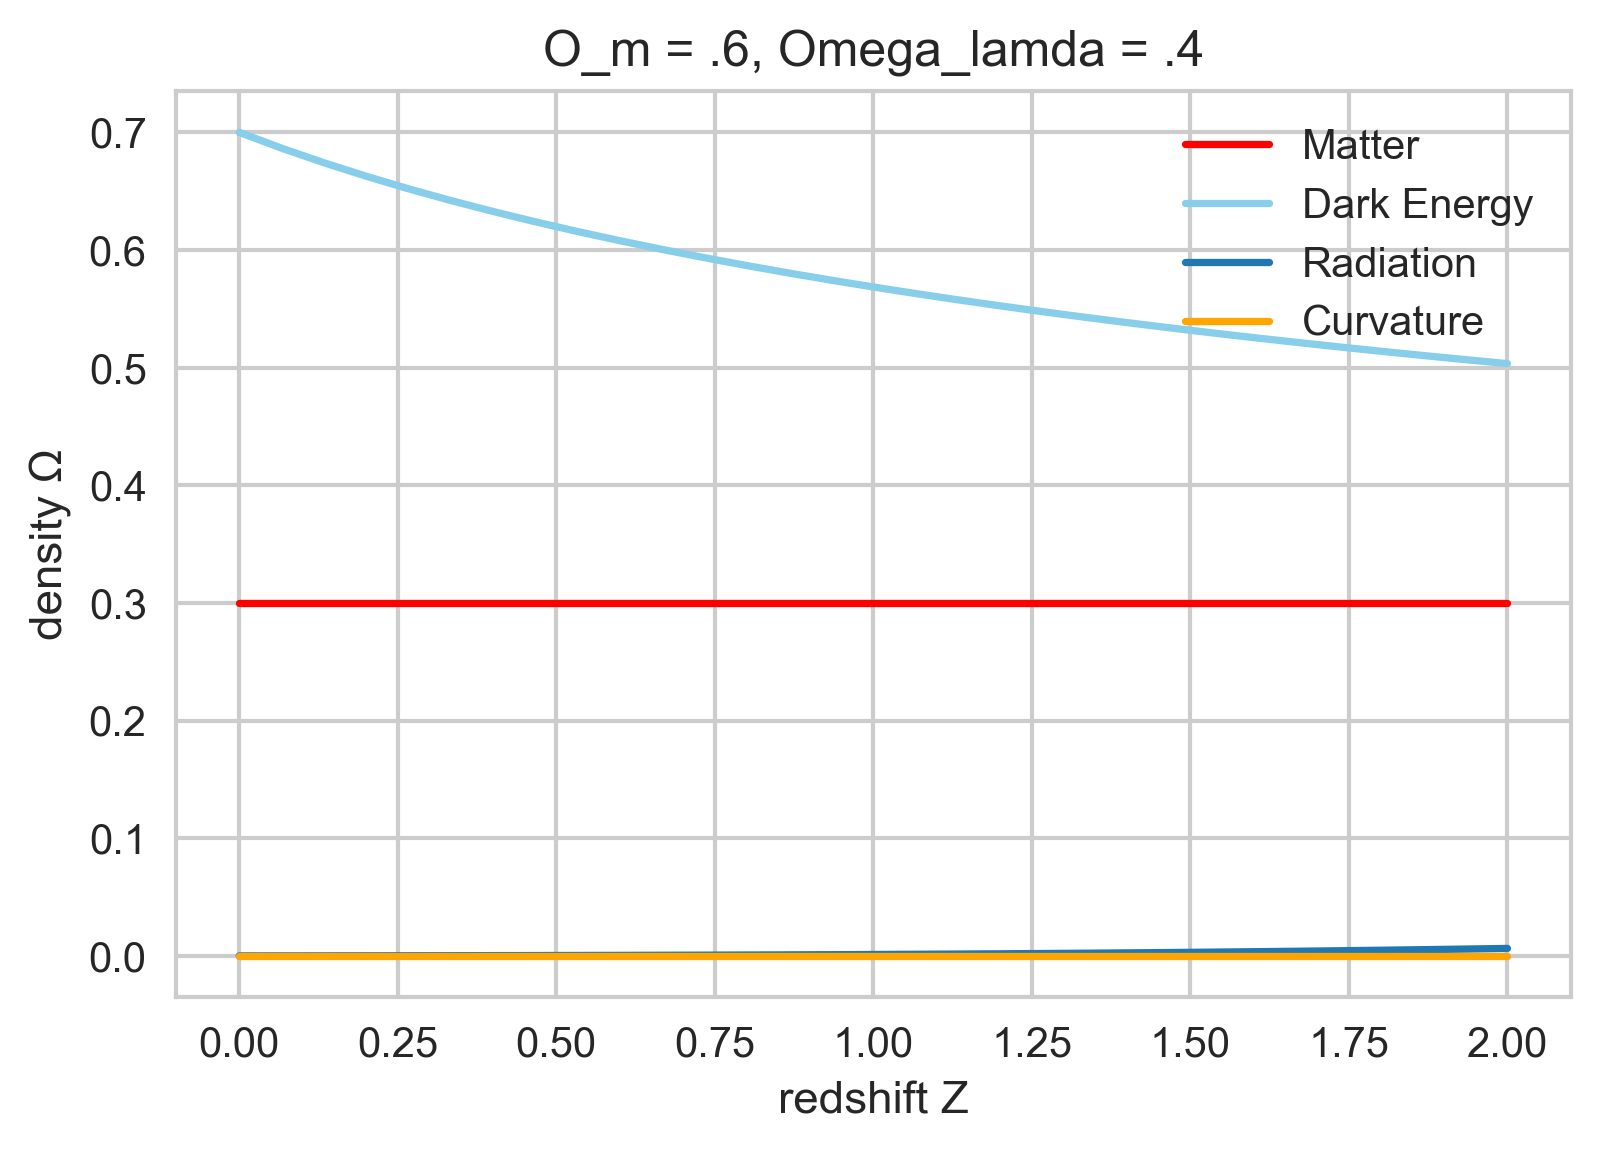

In [1012]:
### Saving this old version of density evolution, instantiate a model for it to work


### Plots of Density evolutions over redshift
### Defining linear space for plotting
# z = np.linspace(0,v,50) 

om = 0.3 
ov = 0.7
NCk = 0.
NCr = 1.
w = -1.1

matter = O_de(z, om)
# matter = OM(z, om)
curvature = Ok(z, om, ov, O_R)
radiation = OR(z, ho)
dark_e = O_de2(z, ov)

plt.plot(z, matter, label = 'Matter', color = 'r')
plt.plot(z, dark_e, label = 'Dark Energy', color = 'skyblue')
plt.plot(z, radiation, label = 'Radiation')
plt.plot(z, curvature, label = 'Curvature', color = 'orange')

plt.legend()
plt.ylabel('density Ω')
plt.xlabel('redshift Z')
plt.title(model)

# print ('Point of Intersection: z = {}'.format(Intersect))